#Logestic Regression

##1.Data Exploration

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [25]:
#Load datasets
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [26]:
# basic EDA
print("=== TRAIN DATASET INFO ===")
print(train_df.info(), "\n")
print(train_df.head(), "\n")

print("=== TEST DATASET INFO ===")
print(test_df.info(), "\n")
print(test_df.head(), "\n")

=== TRAIN DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0      

In [27]:
#Examine features & statistics
# FEATURE TYPE CLASSIFICATION
identifier_features = ['PassengerId']
target_feature = ['Survived']
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Ticket', 'Name']

print("=== FEATURE TYPES (Train Dataset) ===")
print("Identifier Features:", identifier_features)
print("Target Feature:", target_feature)
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

print("\n=== FEATURE TYPES (Test Dataset) ===")
print("Identifier Features:", identifier_features)
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

print("=== TRAIN SUMMARY STATS ===")
print(train_df.describe(include='all'), "\n")

print("=== TEST SUMMARY STATS ===")
print(test_df.describe(include='all'), "\n")

# Missing values check
print("Missing values in TRAIN:\n", train_df.isnull().sum(), "\n")
print("Missing values in TEST:\n", test_df.isnull().sum(), "\n")



=== FEATURE TYPES (Train Dataset) ===
Identifier Features: ['PassengerId']
Target Feature: ['Survived']
Numerical Features: ['Age', 'Fare', 'SibSp', 'Parch']
Categorical Features: ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Ticket', 'Name']

=== FEATURE TYPES (Test Dataset) ===
Identifier Features: ['PassengerId']
Numerical Features: ['Age', 'Fare', 'SibSp', 'Parch']
Categorical Features: ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Ticket', 'Name']
=== TRAIN SUMMARY STATS ===
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min      

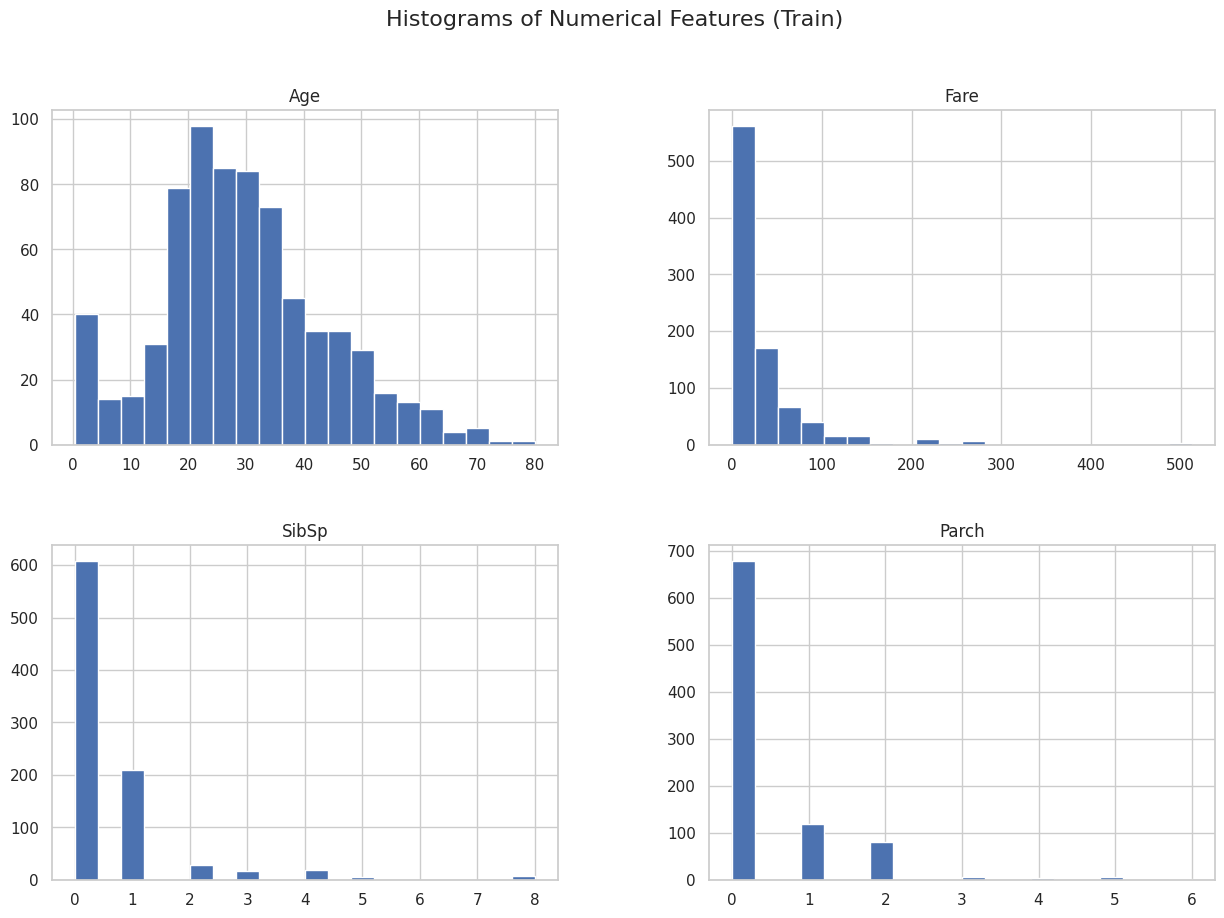

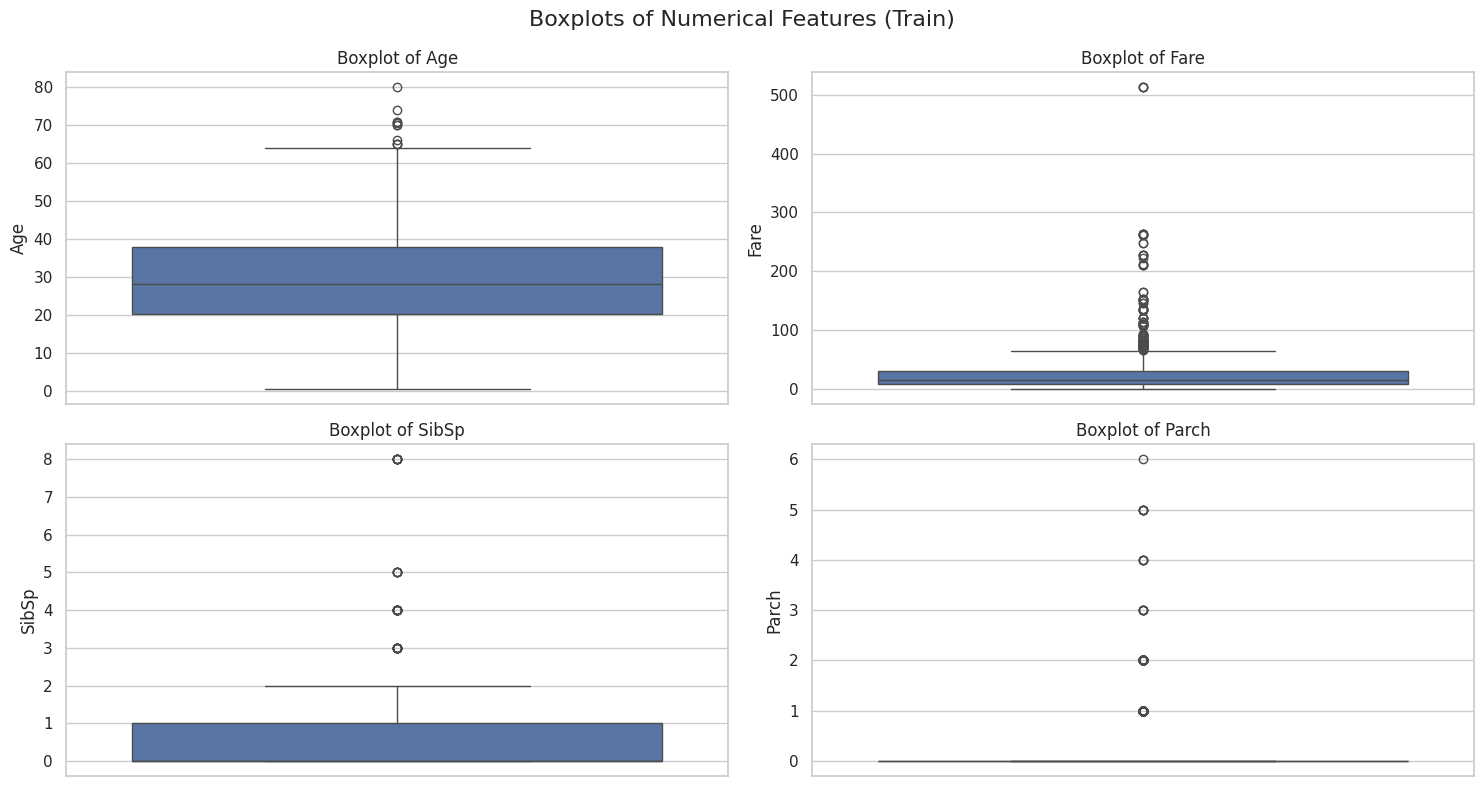

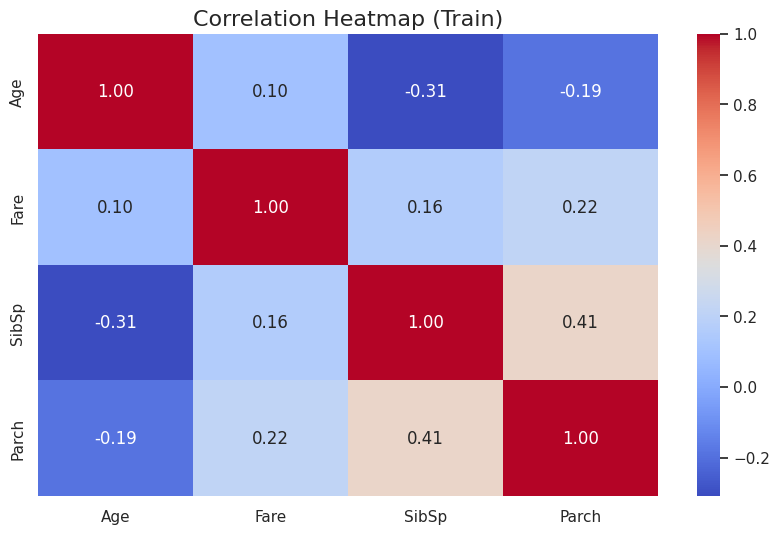

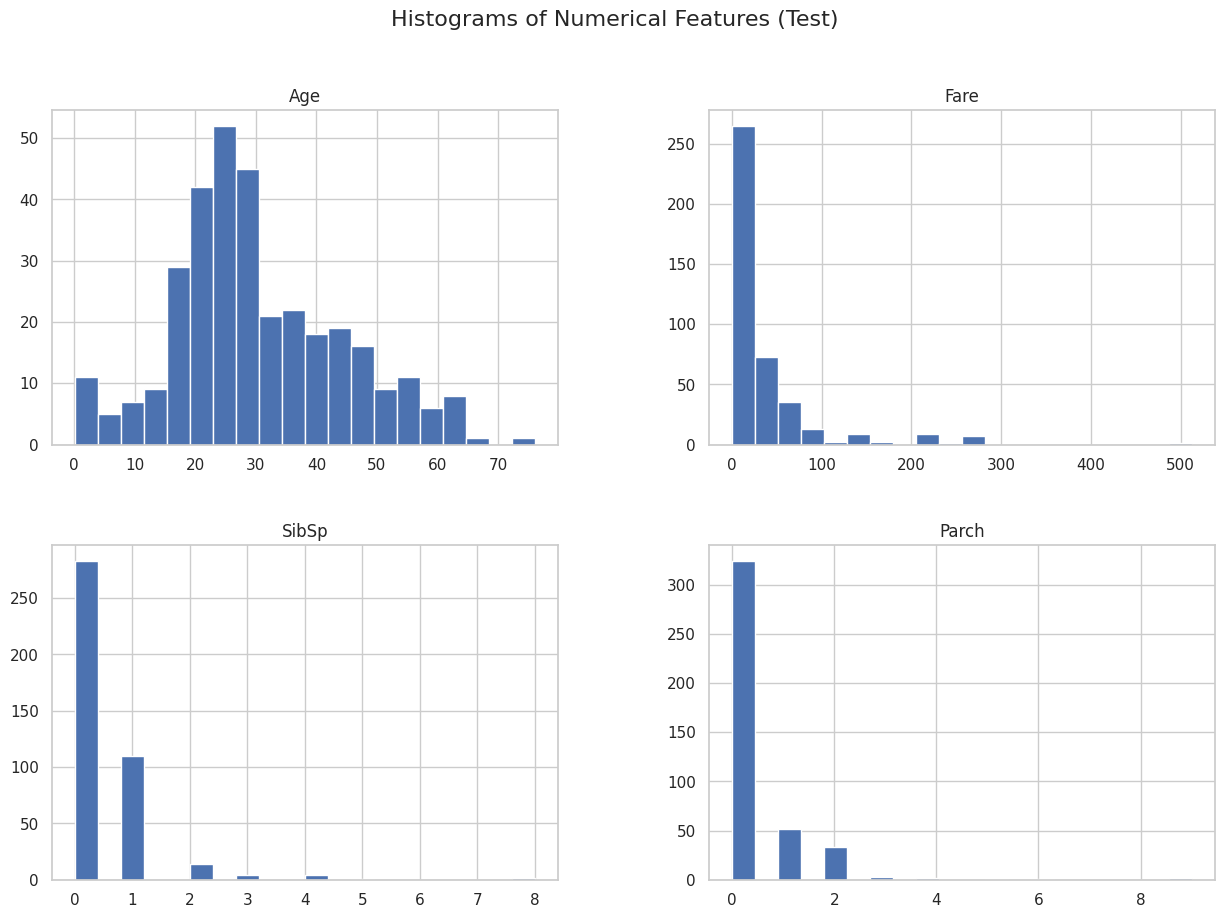

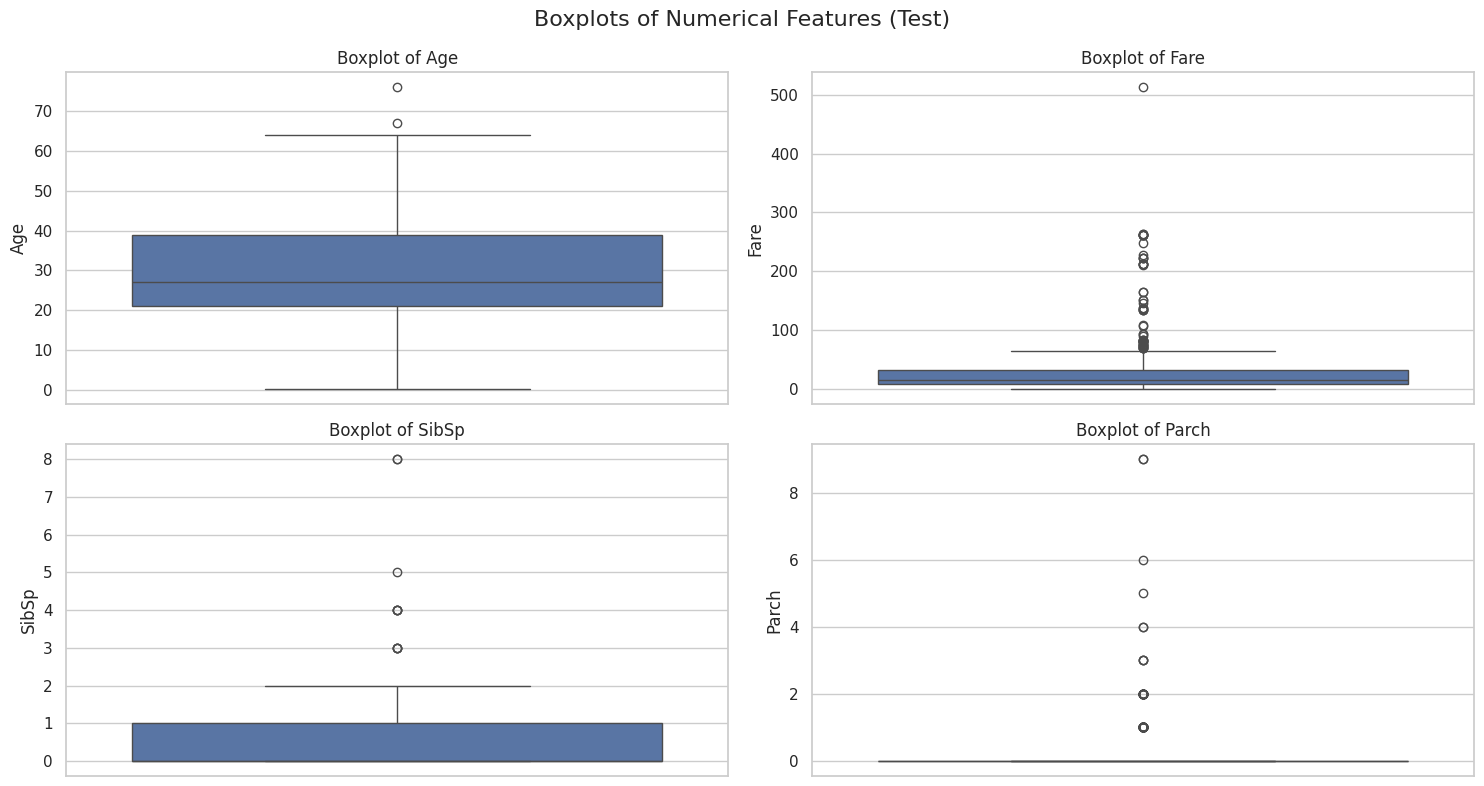

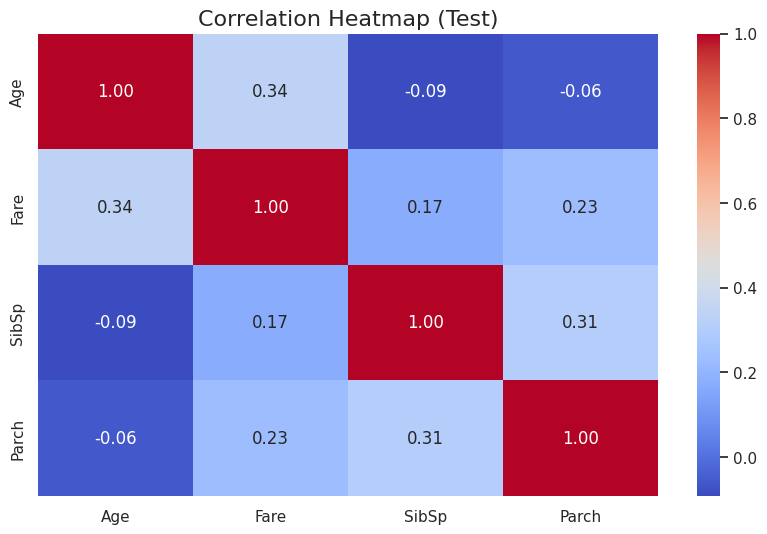

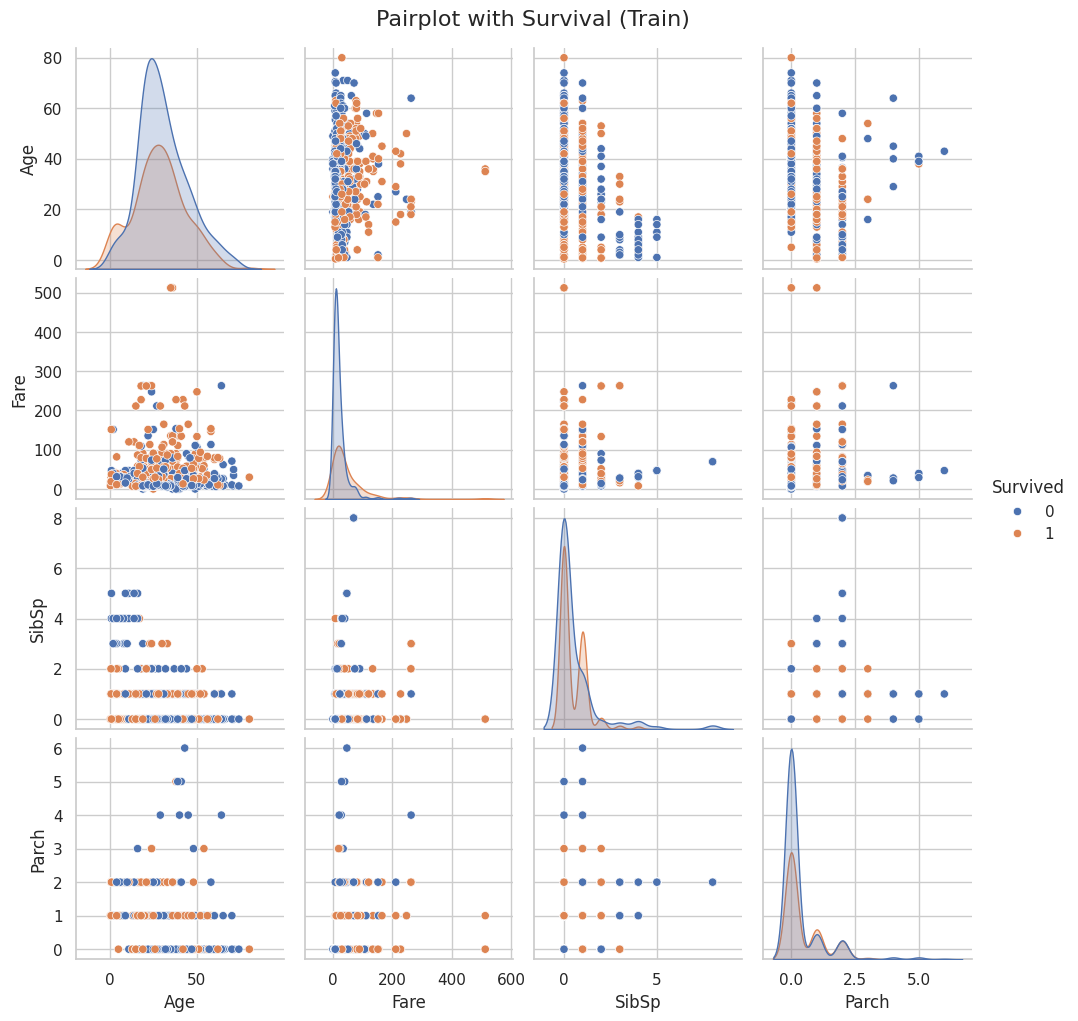

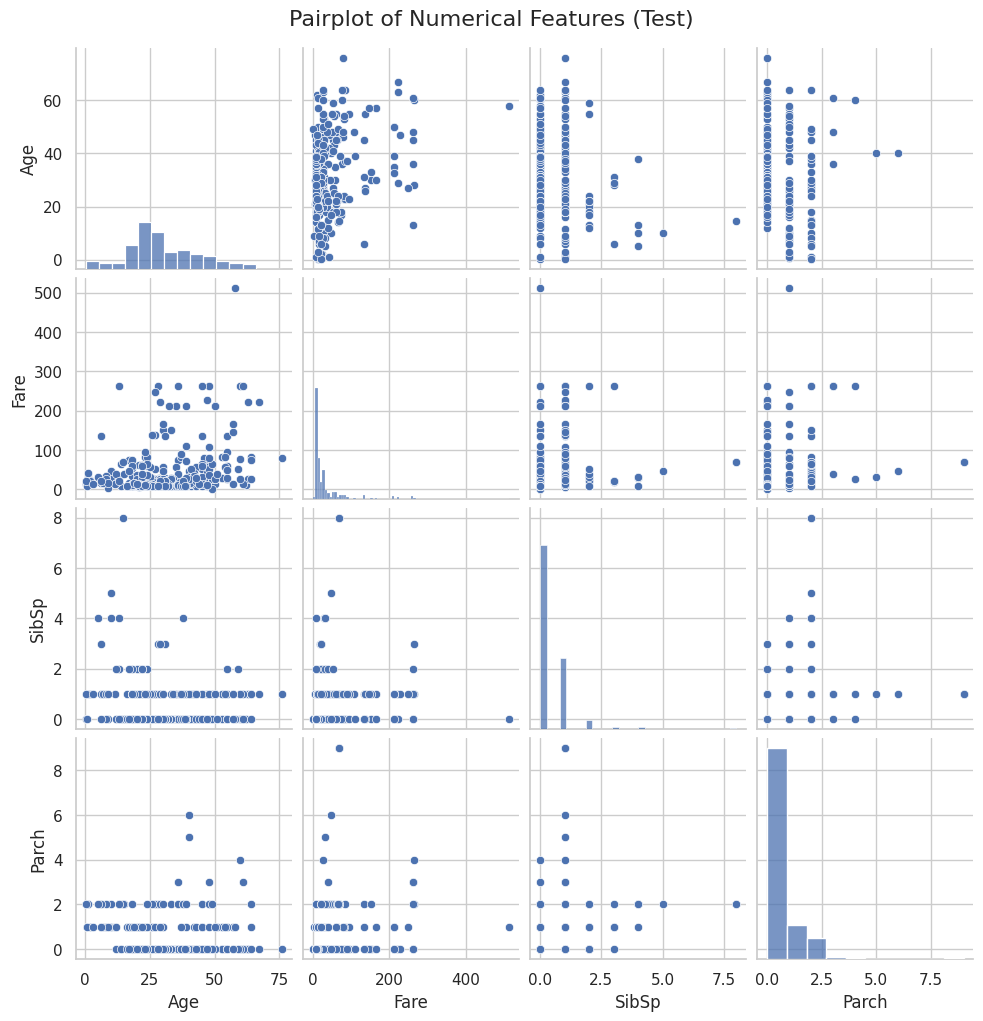

In [28]:
#Visualization for Train and Test Data

#Define numerical features for visualization
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Use seaborn whitegrid style for better visualization
sns.set(style="whitegrid")

#Plot Histograms
# Histograms help us understand the distribution of numerical variables
def plot_histograms(df, title):
    df[numerical_features].hist(bins=20, figsize=(15, 10))
    plt.suptitle(title, fontsize=16)
    plt.show()

#Plot Boxplots
#Boxplots are used to detect outliers and show spread of data
def plot_boxplots(df, title):
    plt.figure(figsize=(15, 8))
    for i, col in enumerate(numerical_features):
        plt.subplot(2, 2, i+1)  # Arrange in 2x2 grid
        sns.boxplot(y=df[col])  # Plot each feature separately
        plt.title(f"Boxplot of {col}")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

#Correlation Heatmap
#Correlation heatmaps show relationships between numerical features
def plot_heatmap(df, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(title, fontsize=16)
    plt.show()


#Train Data Visualizations
plot_histograms(train_df, "Histograms of Numerical Features (Train)")
plot_boxplots(train_df, "Boxplots of Numerical Features (Train)")
plot_heatmap(train_df, "Correlation Heatmap (Train)")

# Test Data Visualizations
plot_histograms(test_df, "Histograms of Numerical Features (Test)")
plot_boxplots(test_df, "Boxplots of Numerical Features (Test)")
plot_heatmap(test_df, "Correlation Heatmap (Test)")


#Pairplot (Train)
# Pairplot shows scatterplots and distributions between multiple variables
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']], hue="Survived")
plt.suptitle("Pairplot with Survival (Train)", y=1.02, fontsize=16)
plt.show()

# Pairplot for Test (only numerical features, since no target)
sns.pairplot(test_df[numerical_features])
plt.suptitle("Pairplot of Numerical Features (Test)", y=1.02, fontsize=16)
plt.show()

In [29]:
#Correlation matrix for numerical features
#Helps to see linear relationships between Survived and numerical variables
print("=== Correlation Matrix (Numerical Features) ===")
print(train_df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']].corr(), "\n")

#Survival rate by Sex
#Checks gender influence on survival probability
print("=== Survival Rate by Sex ===")
print(train_df.groupby('Sex')['Survived'].mean(), "\n")

#Survival rate by Passenger Class (Pclass)
#Shows survival differences across socioeconomic status (1st vs 3rd class)
print("=== Survival Rate by Pclass ===")
print(train_df.groupby('Pclass')['Survived'].mean(), "\n")

#Survival rate by Embarked
#Analyzes survival probability based on port of embarkation
print("=== Survival Rate by Embarked Port ===")
print(train_df.groupby('Embarked')['Survived'].mean(), "\n")

#Average Fare and Age for Survivors vs Non-survivors
#Compares mean values to see if cost or age influenced survival
print("=== Average Fare & Age by Survival ===")
print(train_df.groupby('Survived')[['Age', 'Fare']].mean(), "\n")

#Check missing values
#Identifies features with high missingness (important for preprocessing)
print("=== Missing Values in Train Dataset ===")
print(train_df.isnull().sum(), "\n")


=== Correlation Matrix (Numerical Features) ===
          Survived       Age      Fare     SibSp     Parch
Survived  1.000000 -0.077221  0.257307 -0.035322  0.081629
Age      -0.077221  1.000000  0.096067 -0.308247 -0.189119
Fare      0.257307  0.096067  1.000000  0.159651  0.216225
SibSp    -0.035322 -0.308247  0.159651  1.000000  0.414838
Parch     0.081629 -0.189119  0.216225  0.414838  1.000000 

=== Survival Rate by Sex ===
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 

=== Survival Rate by Pclass ===
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 

=== Survival Rate by Embarked Port ===
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64 

=== Average Fare & Age by Survival ===
                Age       Fare
Survived                      
0         30.626179  22.117887
1         28.343690  48.395408 

=== Missing Values in Train Dataset ===
PassengerId      0
Survived         0
Pclass      

Age distribution is right-skewed, with a concentration of passengers between 20–40 years.

Fare distribution is heavily right-skewed, indicating presence of high-value outliers.

Boxplots confirm extreme values in Fare, suggesting heteroscedasticity in ticket prices.

SibSp and Parch show low variance, with majority values clustered at 0.

Correlation heatmap indicates a moderate positive correlation between Fare and Pclass.

Age exhibits minimal correlation with survival, suggesting weak predictive power.

Fare is positively correlated with survival, indicating higher socioeconomic advantage.

Pairplots confirm class separation, especially between Pclass and Fare distributions.

Missingness in Cabin introduces potential bias, requiring imputation or exclusion.

Overall, categorical variables (Sex, Pclass, Embarked) demonstrate stronger survival association than numerical ones.

##2.DATA PREPROCESSING

In [30]:
# Handle missing values
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# Apply Label Encoding
label_enc = LabelEncoder()
for col in ["Sex", "Embarked"]:
    train_df[col] = label_enc.fit_transform(train_df[col])
    test_df[col] = label_enc.transform(test_df[col])

# Apply One-Hot Encoding
categorical_cols = ["Sex", "Embarked", "Pclass"]
train_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Align train and test to ensure same columns
train_encoded, test_encoded = train_encoded.align(test_encoded, join="left", axis=1, fill_value=0)

# Define features (X) and target (y) from the preprocessed training data
X = train_encoded.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')
y = train_encoded['Survived']

# Split the preprocessed training data into training and validation sets for model evaluation
X_train_eval, X_val, y_train_eval, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical features for scaling (excluding one-hot encoded columns and PassengerId)
numerical_features_processed = ['Age', 'Fare', 'SibSp', 'Parch']

# Initialize and apply StandardScaler to the evaluation training and validation sets
scaler = StandardScaler()
X_train_eval[numerical_features_processed] = scaler.fit_transform(X_train_eval[numerical_features_processed])
X_val[numerical_features_processed] = scaler.transform(X_val[numerical_features_processed])

##3.Model building

In [31]:
# Build the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [32]:
#Train the Logistic Regression model
log_reg.fit(X_train_eval, y_train_eval)

print("Model training complete.")

Model training complete.


##4.Model Evaluation

In [33]:
# Predictions on the validation set (X_val)
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-Score:", f1_score(y_val, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba))

Accuracy: 0.7932960893854749
Precision: 0.7681159420289855
Recall: 0.7162162162162162
F1-Score: 0.7412587412587412
ROC-AUC Score: 0.8711711711711713


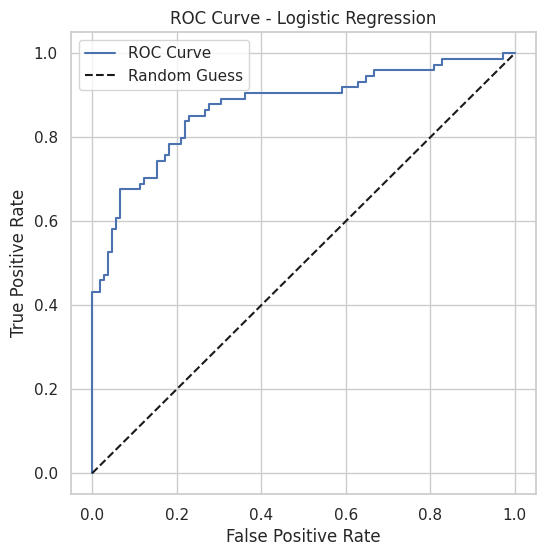

In [35]:
#Visualize ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

##Interpretation

In [36]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

# Display coefficients
print(coefficients)

       Feature  Coefficient
0  PassengerId     0.000354
1          Age    -0.359895
2        SibSp    -0.329571
3        Parch    -0.107950
4         Fare     0.220506
5        Sex_1    -2.585912
6   Embarked_1    -0.121502
7   Embarked_2    -0.456003
8     Pclass_2    -0.374499
9     Pclass_3    -1.584866


In [37]:
import pandas as pd
import numpy as np

# Get coefficients and odds ratios
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0],
})
coefficients["Odds_Ratio"] = np.exp(coefficients["Coefficient"])
coefficients["Abs_Coefficient"] = coefficients["Coefficient"].abs()

# Sort by importance (absolute value of coefficient)
coefficients = coefficients.sort_values(by="Abs_Coefficient", ascending=False)

print("Feature Significance in Predicting Survival:\n")
for feature, coef, odds in zip(coefficients["Feature"],
                               coefficients["Coefficient"],
                               coefficients["Odds_Ratio"]):
    if coef > 0:
        print(f"{feature}: Positive effect (coef={coef:.3f}, odds={odds:.2f}) → increases survival probability.")
    else:
        print(f"{feature}: Negative effect (coef={coef:.3f}, odds={odds:.2f}) → decreases survival probability.")


Feature Significance in Predicting Survival:

Sex_1: Negative effect (coef=-2.586, odds=0.08) → decreases survival probability.
Pclass_3: Negative effect (coef=-1.585, odds=0.20) → decreases survival probability.
Embarked_2: Negative effect (coef=-0.456, odds=0.63) → decreases survival probability.
Pclass_2: Negative effect (coef=-0.374, odds=0.69) → decreases survival probability.
Age: Negative effect (coef=-0.360, odds=0.70) → decreases survival probability.
SibSp: Negative effect (coef=-0.330, odds=0.72) → decreases survival probability.
Fare: Positive effect (coef=0.221, odds=1.25) → increases survival probability.
Embarked_1: Negative effect (coef=-0.122, odds=0.89) → decreases survival probability.
Parch: Negative effect (coef=-0.108, odds=0.90) → decreases survival probability.
PassengerId: Positive effect (coef=0.000, odds=1.00) → increases survival probability.


Sex (male): This is the most significant predictor. The negative coefficient indicates that being male greatly reduces the probability of survival, which aligns with the historical “women and children first” policy.

Passenger Class (Pclass): Higher-class passengers had better survival chances. The negative coefficient shows that being in 3rd class decreased survival probability compared to 1st class.

Fare: A positive coefficient means passengers who paid higher fares (wealthier) were more likely to survive, probably because they were in better cabins and had easier access to lifeboats.

Age: The negative coefficient suggests that younger passengers had better chances of survival, while older passengers were less likely to survive.

Embarkation Point (Embarked_C, Embarked_Q): Passengers embarking at Cherbourg or Queenstown had slightly better chances of survival compared to Southampton.

Family (SibSp, Parch): Having too many siblings/spouses reduced chances (crowding, difficulty escaping), while having a parent or child on board slightly improved survival chances.

##Interview Questions

**What is difference between precision and recall?**


1. **What they measure:**

   * **Precision** measures **accuracy of positive predictions**. It asks: “Of all the instances I predicted as positive, how many are truly positive?”
   * **Recall** measures **coverage of actual positives**. It asks: “Of all the real positive cases, how many did I correctly identify?”

2. **Focus on errors:**

   * **Precision** focuses on **false positives (FP)** — predicting something positive that isn’t.
   * **Recall** focuses on **false negatives (FN)** — failing to identify something that is actually positive.

3. **When each matters:**

   * **Precision is important** when **false alarms are costly**.

     * Example: Spam filter – labeling an important email as spam is bad.
   * **Recall is important** when **missing a positive is costly**.

     * Example: Cancer detection – missing a sick patient is dangerous.

4. **Trade-off:**

   * Increasing precision usually **reduces recall**, and increasing recall usually **reduces precision**.
   * **F1-score** is used to balance both, giving a single metric that considers precision and recall together.


    
    * **Precision = correctness of positive predictions**
   * **Recall = completeness of capturing all positives**



**2. What is cross-validation, and why is it important in binary classification?**

Cross-validation is a technique used to evaluate a machine learning model’s performance more reliably. Instead of splitting the data into just one training and testing set, cross-validation splits the data into multiple parts (called folds), trains the model on some folds, and tests it on the remaining fold. This process is repeated for each fold, and the results are averaged.

**Why it’s important in binary classification:**

**Reduces overfitting**: By testing the model on multiple subsets, it ensures the model isn’t just memorizing the training data.

**Provides a reliable evaluation:** Single train-test splits can give misleading results if the split is not representative. Cross-validation gives a more stable estimate of performance.

**Helps in model selection and tuning:** By comparing average results across folds, you can choose the best model or hyperparameters.

**Improves generalization:** It ensures the model works well on unseen data, which is critical in sensitive applications like disease detection or fraud detection.